# Seaborn


Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
data_file='Existing Base.csv'
# data set taken here is 'Existing Base'

eb=pd.read_csv(data_file)

In [4]:
eb=eb.head(100) # for the sake of simplicity i have taken only first 100 observations, 
                #you can go ahead and can consider the whole dataset

# Visualising Numeric Data

Let's take the variable "Portfolio Balance" and see its distribution for which we use distplot() function. This function by default will give histogram and fit a kernel density estimate (KDE).

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

The KDE plots the density of observations on one axis with height along the other axis.

In [5]:
eb_port=eb["Portfolio Balance"]


C:\Users\prate\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


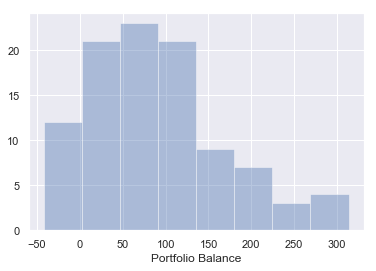

In [6]:
sns.distplot(eb_port,kde=False) # I have taken kde=False just to obtain histogram

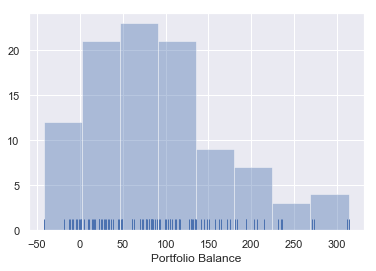

In [7]:
sns.distplot(eb_port, kde=False, rug=True) #rug plot will draw a small vertical tick at each observation.

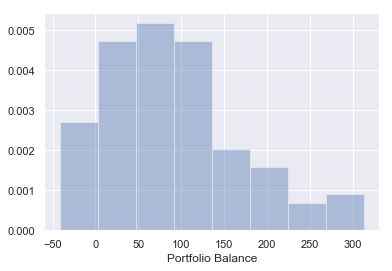

In [8]:
sns.distplot(eb_port,kde=False,norm_hist=True) #density on y axis rather than count

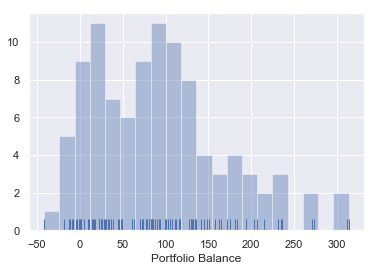

In [9]:
sns.distplot(eb_port,bins=20, kde=False, rug=True)#binning, number of bins can be chosen explictly

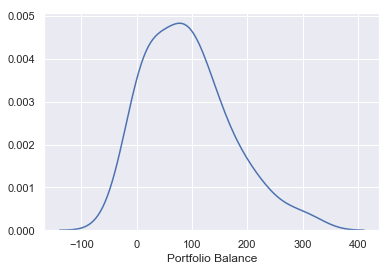

In [10]:
sns.distplot(eb_port, hist=False)#density plot

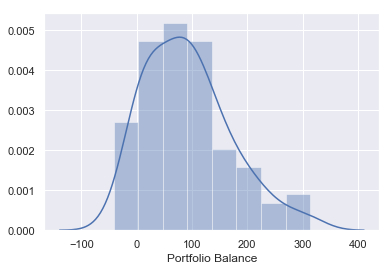

In [11]:
sns.distplot(eb_port) #both density and histogram plots

You can also use kdeplot() to plot density distributions of variables in a single frame

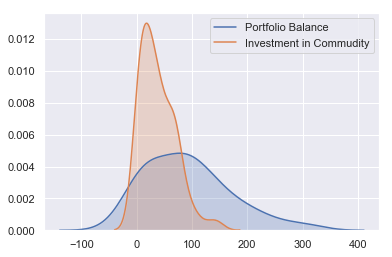

In [12]:
sns.kdeplot(eb["Portfolio Balance"], shade=True)
sns.kdeplot(eb["Investment in Commudity"], shade=True);

# Plotting Bivariate Distributions


Seaborn is useful to visualize a bivariate distribution of two variables. Here we use the jointplot function which shows both the bivariate relationship between two variables along with the univariate distribution of each on separate axes.

Let's consider two variables here "Investment in Commudity" and "Portfolio Balance" and visualize there bivariate distribution.

### Scatterplots

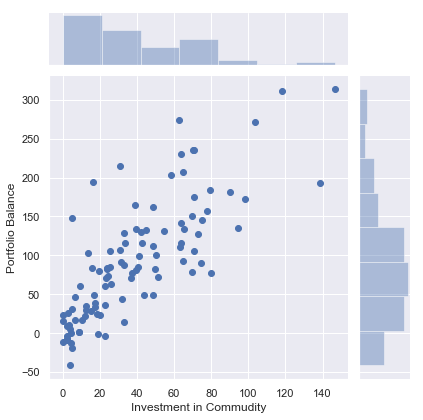

In [13]:
sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", data=eb)
# scatterplot is default kind of plot shown by the jointplot() function

### Hexbin plots

This plot shows the counts of observations that fall within hexagonal bins.

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


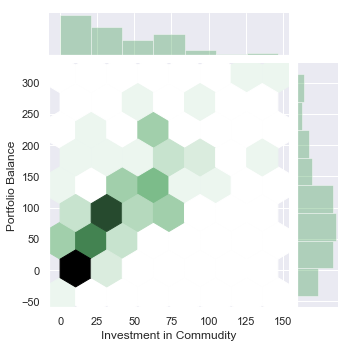

In [14]:
sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", kind="hex",size=5,color="g",data=eb)
# you can always customize attributes size and color

### Kernel density estimation

Bivariate distribution can also be visualized using the kernel density estimation.

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


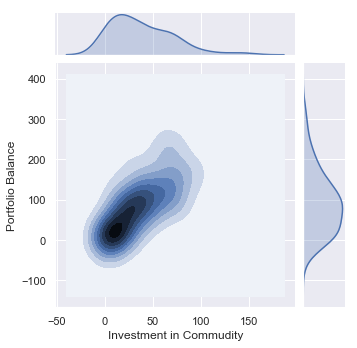

In [15]:
sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", kind="kde",size=5,data=eb)

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


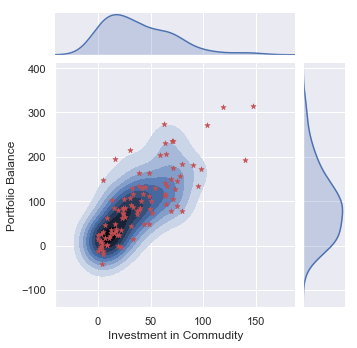

In [16]:
s=sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", kind="kde",size=5,data=eb)
s.plot_joint(plt.scatter, c="r", s=30, linewidth=0.5, marker="*")
s.ax_joint.collections[0].set_alpha(0);
# you can add more layers to it to tweak other aspects of visualization

### Functions to draw linear regression models

Now to visualize a linear relationship between two variables we use the function lmplot().

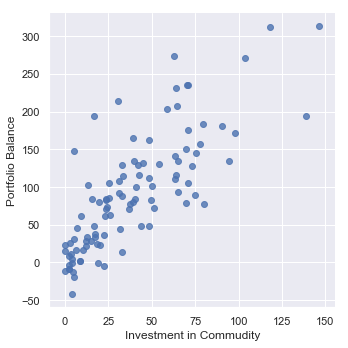

In [17]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
           data=eb,palette="Set1",
           fit_reg=False)

# fit_reg=False will give only the scatterplot of both the variables

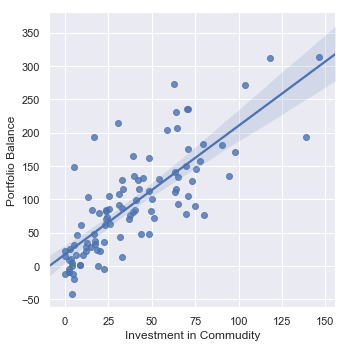

In [18]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
           data=eb,palette="Set1")
# lmplot function by default gives a regression line (linear relationship) between the two variables

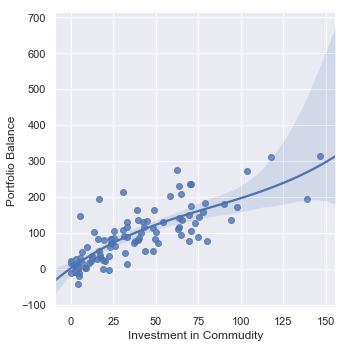

In [19]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
           data=eb, 
           order=3)

# setting order here will give polynomial relationship between two variables

Text(0.5, 1.0, 'myplot')

C:\Users\prate\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


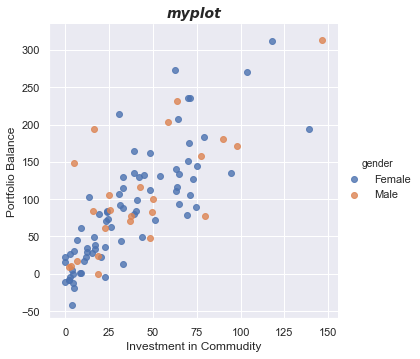

In [20]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', hue="gender",data=eb,fit_reg=False)
plt.title("myplot", fontname='Ubuntu', fontsize=14,
            fontstyle='italic', fontweight='bold')

# shows how does the relationship between the two variables change as a function of a third variable,
# here the third variable is "gender"

#Note: You can add lable to this such as title

To add another variable, 
you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid.

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


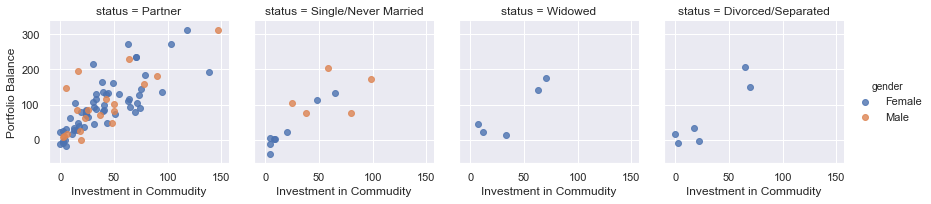

In [21]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', hue="gender",col="status",data=eb,fit_reg=False,size=3)

C:\Users\prate\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


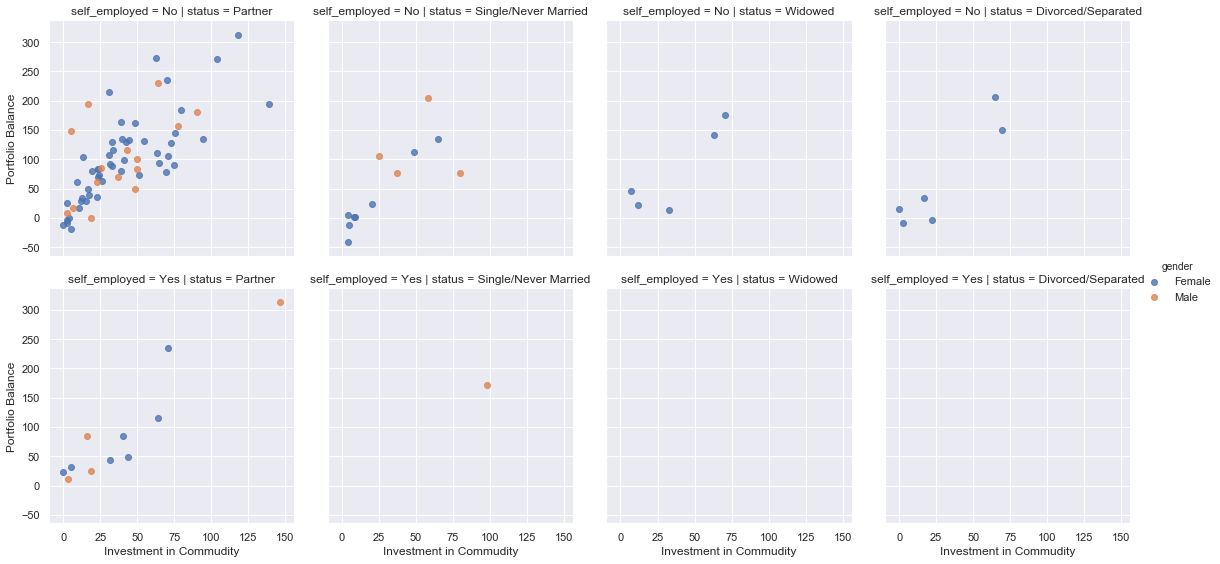

In [22]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', hue="gender",col="status",row="self_employed",
            data=eb,fit_reg=False,size=4)

# Visualising categorical data

From above plots we have seen bivariate relationship between two continuous variabes, but what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work.

So we are going to look into different plots in order to visualize categorical variables.

### Categorical Scatterplots

We will use the function stripplot(), which generalizes a scatterplot to the case where one of the variables is categorical

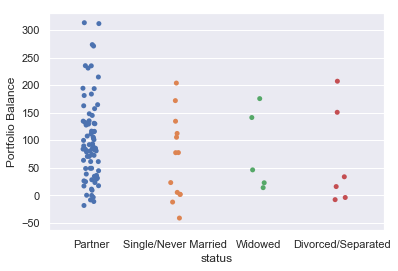

In [23]:
sns.stripplot(x='status', y="Portfolio Balance", data=eb,jitter=True)
# jitter is used to avoid any overlap between the data points

Or you can use swarmplot(),which positions each scatterplot point on the categorical axis such that it avoids overlapping points

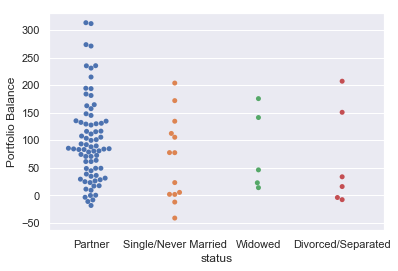

In [24]:
sns.swarmplot(x='status', y="Portfolio Balance", data=eb)

You can also add another categorical variable using hue parameter

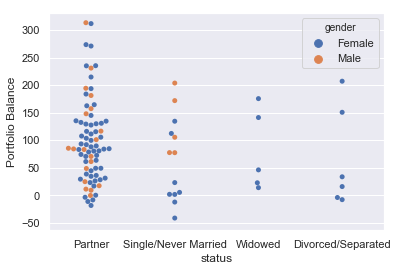

In [25]:
sns.swarmplot(x='status', y="Portfolio Balance",hue="gender", data=eb)

### Distributions of observations within categories

**boxplot():** shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile and the points outside these are considered as outliers.

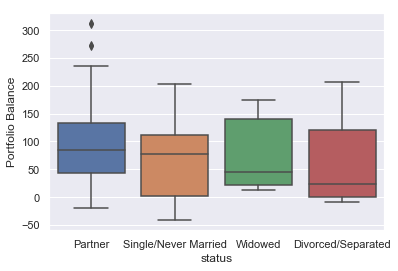

In [26]:
sns.boxplot(x='status', y="Portfolio Balance", data=eb)


**violinplot():** combines a boxplot with the kernel density estimation, the quartile and whikser values from the boxplot are shown inside the violin

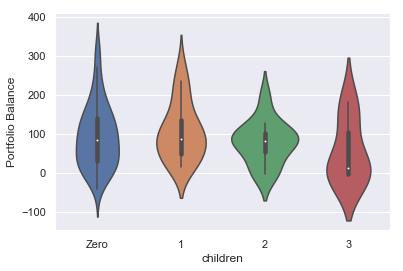

In [27]:
sns.violinplot(y="Portfolio Balance", x="children", data=eb)

You can also add another categorical variable using hue parameter

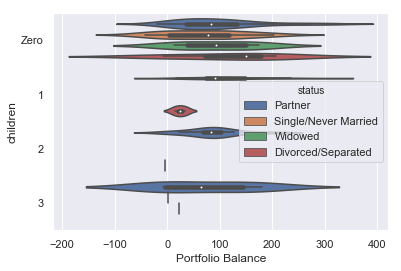

In [28]:
sns.violinplot(x="Portfolio Balance", y="children",hue="status", data=eb)

# Statistical estimation within categories

**countplot():** counts number of observations in each category.

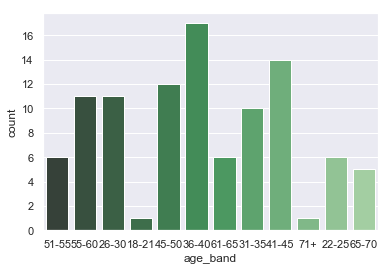

In [29]:
sns.countplot(x="age_band", data=eb,palette="Greens_d")
# gives the count of each age_band

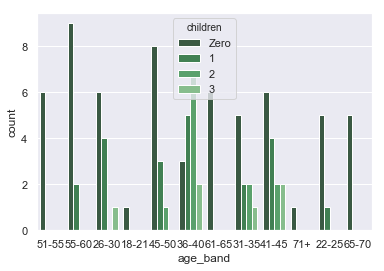

In [30]:
sns.countplot(x="age_band", data=eb,hue="children",palette="Greens_d")
# adding another categorical variable

**barplot():** operates on a full dataset and shows an arbitrary estimate, using the mean by default.

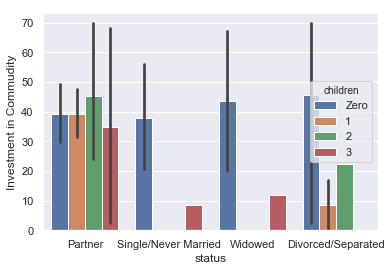

In [31]:
sns.barplot(x="status", y="Investment in Commudity",hue="children",data=eb)

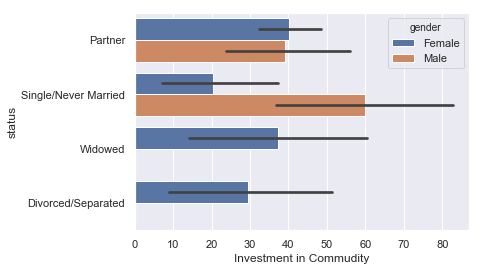

In [32]:
sns.barplot(x="Investment in Commudity", y="status",hue="gender",data=eb)

# Heatmap


Load the example flights dataset and convert to long-form

In [33]:
sns.set()
flights = sns.load_dataset("flights")
flights.dropna().head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights_long = flights.pivot("month", "year", "passengers")
flights_long

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


heatmap() function gives a good color mapping of the data.

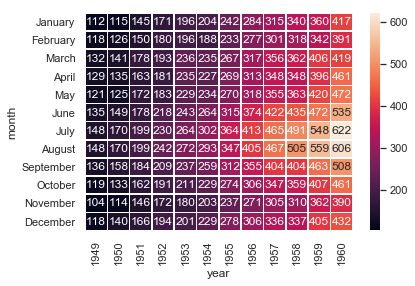

In [35]:
sns.heatmap(flights_long, annot=True, fmt="d", linewidths=.5)